In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [34]:
wine.shape

(1599, 12)

In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [40]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Figure size 500x500 with 0 Axes>

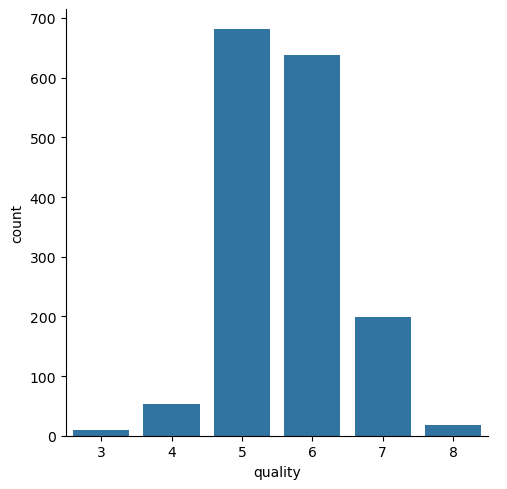

In [42]:
plt.figure(figsize=(5,5))
sns.catplot(x='quality', data=wine, kind='count')

<Axes: xlabel='quality', ylabel='fixed acidity'>

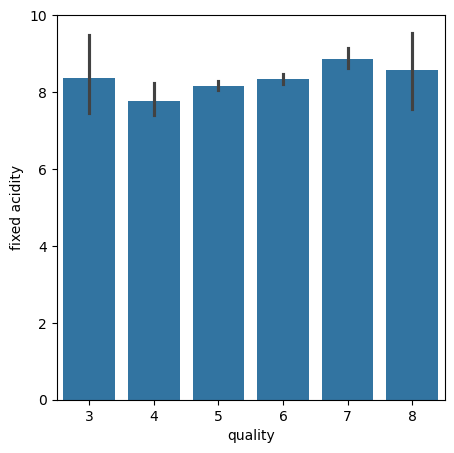

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity',data=wine)

In [46]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='quality', ylabel='citric acid'>

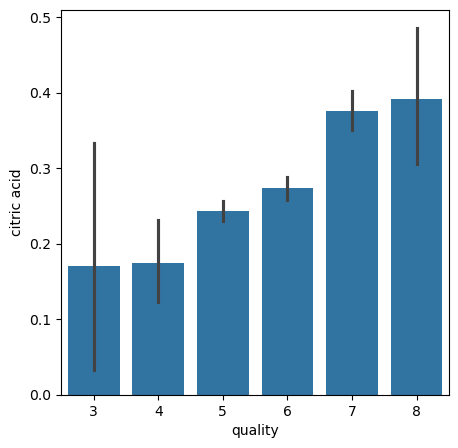

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

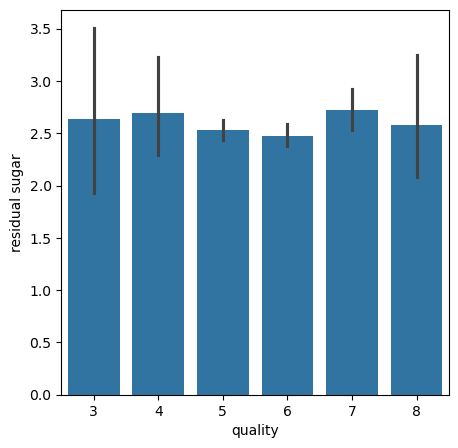

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine)

In [52]:
x = wine.drop('quality', axis=1)
y = wine['quality'].apply(lambda value:1 if value>=7 else 0)

In [54]:
x.shape

(1599, 11)

In [56]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [58]:
correlation = wine.corr()

<Axes: >

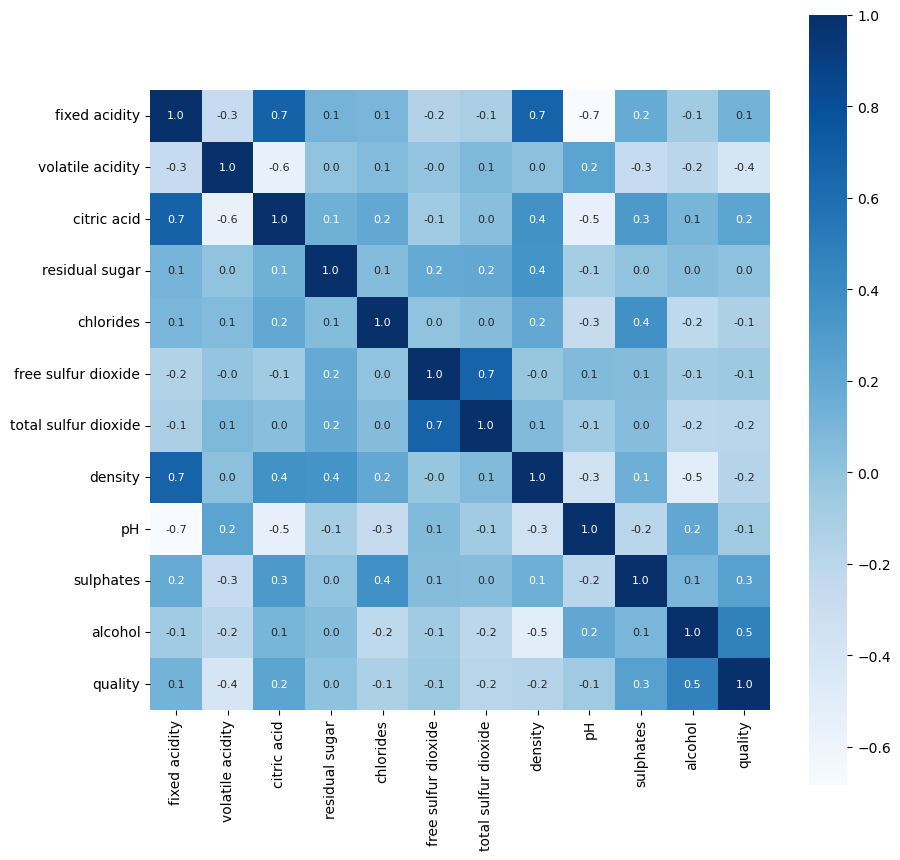

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

In [62]:
X = wine.drop('quality',axis=1)

In [64]:
y = wine['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [66]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [70]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [85]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
ypred = classifier.predict(X_test)

In [87]:
accuracy_score(ypred, Y_test)

0.921875

In [89]:
input_data = (6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1015,10.5,0.39,0.46,2.20,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6
108,8.0,0.33,0.53,2.50,0.091,18.0,80.0,0.99760,3.37,0.80,9.6,6
1414,10.0,0.32,0.59,2.20,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5
662,7.2,0.57,0.06,1.60,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6
326,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7
1522,6.1,0.32,0.25,2.30,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,5
848,6.4,0.64,0.21,1.80,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5
718,8.4,0.56,0.04,2.00,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
481,9.4,0.30,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
1420,7.8,0.53,0.01,1.60,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
